In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [11]:
# Load Titanic dataset
titanic = pd.read_csv('Titanic-Dataset.csv')

# Preview random sample
titanic.sample(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.000,NaN,S
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775,NaN,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.000,B20,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.500,E34,C


In [12]:
# Basic info
titanic.info()

# Summary statistics
titanic.describe(include='all')

# Check missing values
titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Drop 'Cabin' due to high missing ratio
titanic = titanic.drop(columns='Cabin')

# Fill missing 'Age' with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Fill missing 'Embarked' with most frequent value
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Remove any duplicate rows
titanic = titanic.drop_duplicates()



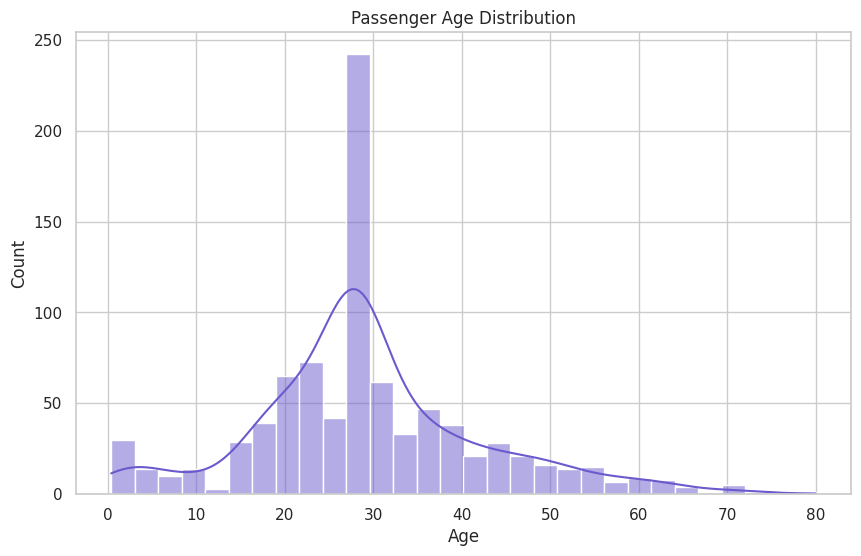

In [18]:
# Age distribution
sns.histplot(titanic['Age'], bins=30, kde=True, color='slateblue')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


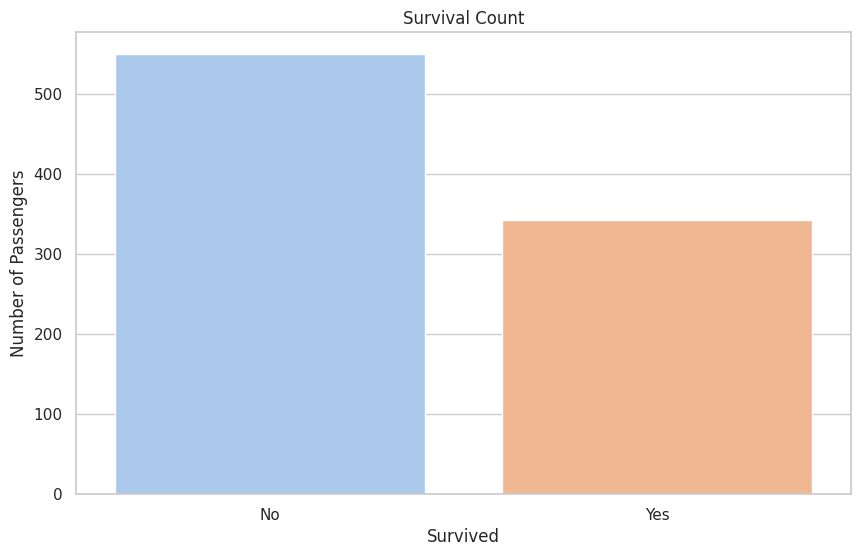

In [17]:
sns.countplot(x='Survived', hue='Survived', data=titanic, palette='pastel', legend=False)
plt.title('Survival Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Passengers')
plt.show()



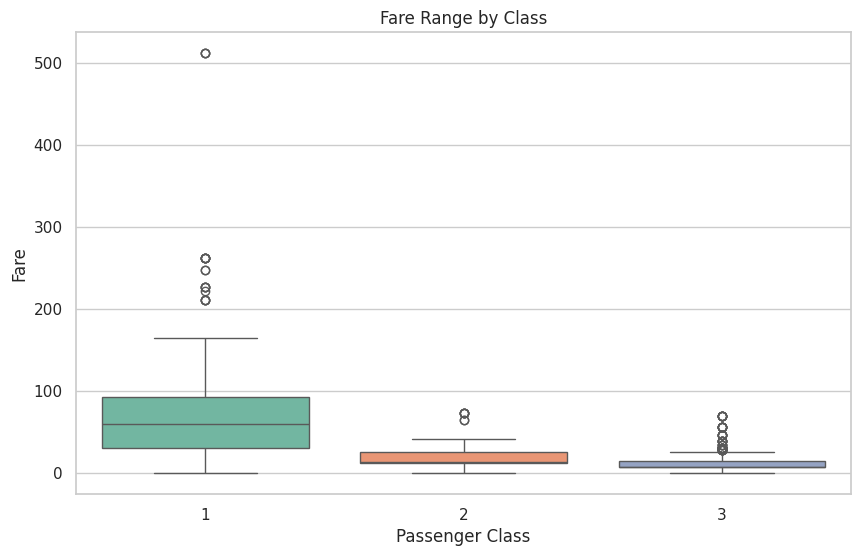

In [20]:
sns.boxplot(x='Pclass', y='Fare', hue='Pclass', data=titanic, palette='Set2', legend=False)
plt.title('Fare Range by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()



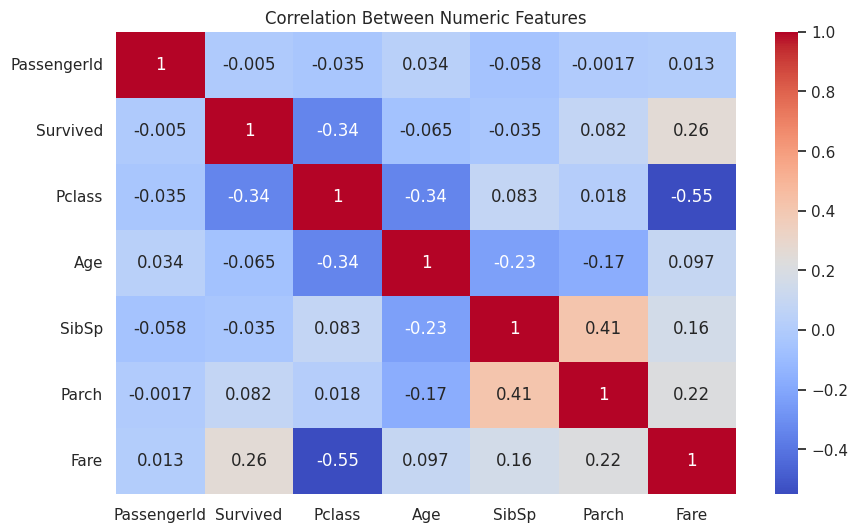

In [21]:
# Correlation heatmap
corr = titanic.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


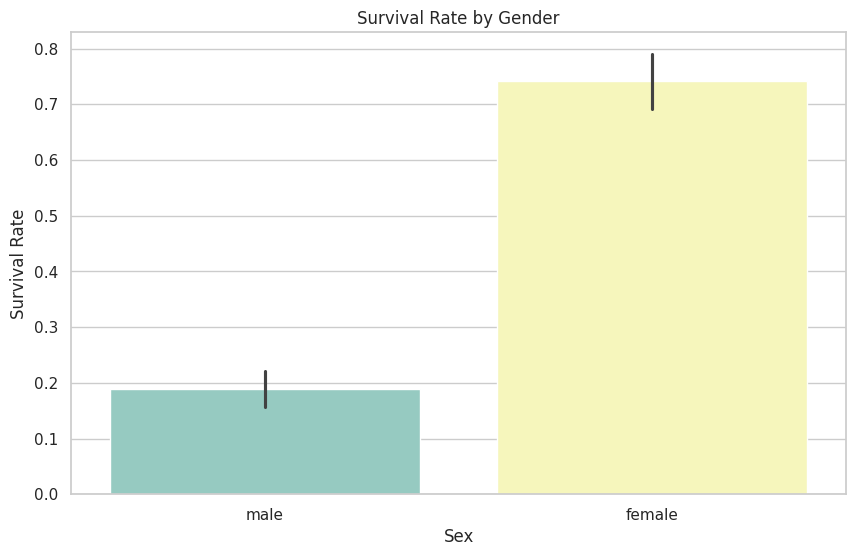

In [23]:
sns.barplot(x='Sex', y='Survived', hue='Sex', data=titanic, palette='Set3', legend=False)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


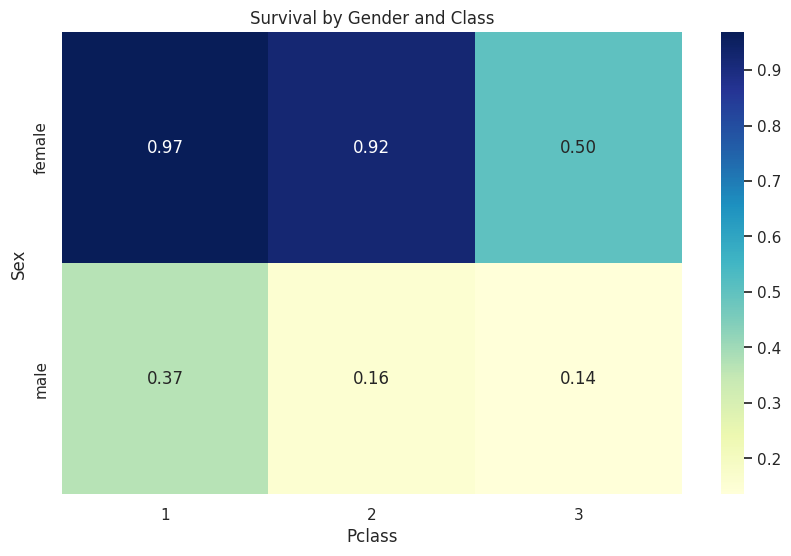

In [24]:
# Pivot table: Survival by Gender and Class
pivot = titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival by Gender and Class')
plt.show()


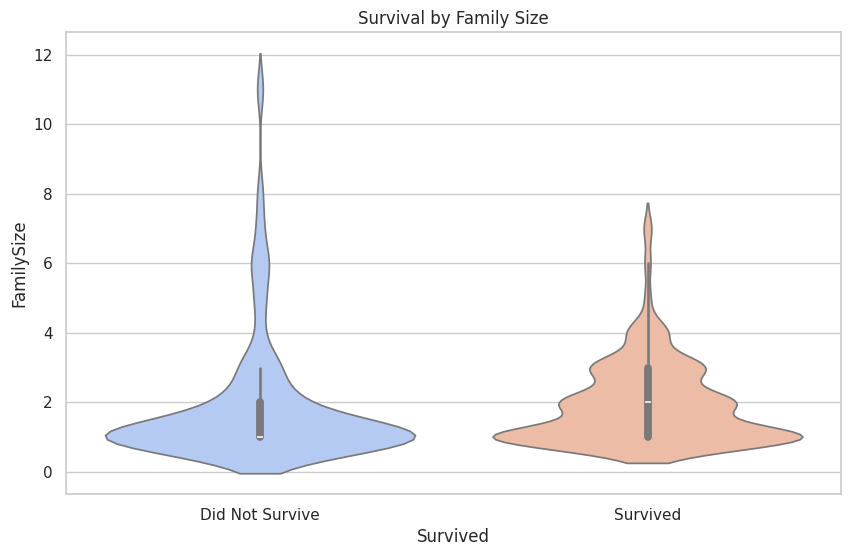

In [26]:
sns.violinplot(x='Survived', y='FamilySize', hue='Survived', data=titanic, palette='coolwarm', legend=False)
plt.title('Survival by Family Size')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()


In [27]:
titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].to_csv('tested.csv', index=False)
